In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

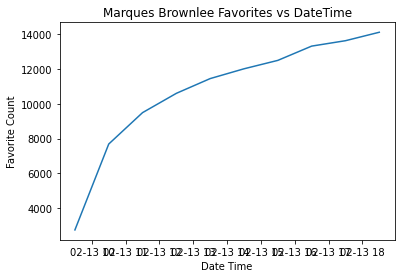

In [36]:
'''Date Time vs Favorites Cell'''

dataFrame_Brownlee = pd.read_csv('/Users/ch_kus/Desktop/marq_1hr.csv')

dataFrame_Brownlee = dataFrame_Brownlee[0:10]

#define date as datetime column, parse the text to a datetime object
#change id to datetime column pd["Retweets"].plot()
#convert the string into datetime (string formatting for datetime)
dataFrame_Brownlee["DateTime"] = pd.to_datetime(dataFrame_Brownlee['DateTime'])
var = dataFrame_Brownlee["DateTime"]

%matplotlib inline
plt.title("Marques Brownlee Favorites vs DateTime")
plt.xlabel("Date Time")
plt.ylabel("Favorite Count")
plt.plot(var, dataFrame_Brownlee.Favorites)

#x axis labeling (range of datetimes)

#plot only a section of graph 

#plot the differences (derivative) - different dataframe

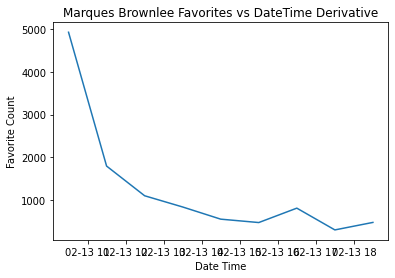

In [16]:
'''Derivative Graph (Favorites vs DateTime)'''

derivativeList = dataFrame_Brownlee.Favorites.diff()

%matplotlib inline
plt.title("Marques Brownlee Favorites vs DateTime Derivative")
plt.xlabel("Date Time")
plt.ylabel("Favorite Count")
plt.plot(var, derivativeList)

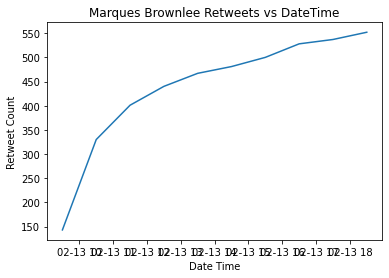

In [17]:
'''Favorites vs Retweets Data Graph'''

%matplotlib inline
plt.title("Marques Brownlee Retweets vs DateTime")
plt.xlabel("Date Time")
plt.ylabel("Retweet Count")
plt.plot(var, dataFrame_Brownlee.Retweets)

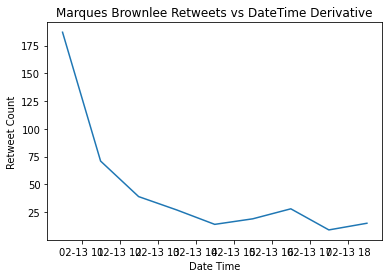

In [18]:
'''Derivative Graph (Retweets vs DateTime)'''

derivativeList_r = dataFrame_Brownlee.Retweets.diff()

%matplotlib inline
plt.title("Marques Brownlee Retweets vs DateTime Derivative")
plt.xlabel("Date Time")
plt.ylabel("Retweet Count")
plt.plot(var, derivativeList_r)

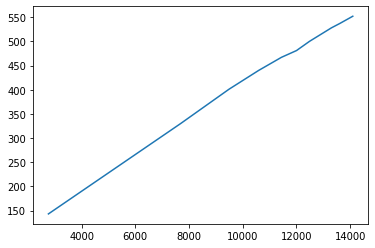

In [19]:
'''Favorites vs Retweets Data Graph'''

plt.plot(dataFrame_Brownlee.Favorites, dataFrame_Brownlee.Retweets)
#calculate correlation coefficient, find linear regressions, and confidence interval

#Find methods to compute Time series 

In [20]:
'''Calculating Pearson Correlation Cell'''

#calculates correlation (Note: try to be explicit)
dataFrame_Brownlee.corr(method ='pearson')  

,Favorites,Retweets
Favorites,1.000000,0.999007
Retweets,0.999007,1.000000


In [21]:
'''Calculating Slope Cell'''

X = dataFrame_Brownlee.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dataFrame_Brownlee.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  #Y_pred stores the y coordinates of the line of best fit

#Play with the parameters

#Find the slove of red line and find the confidence interval

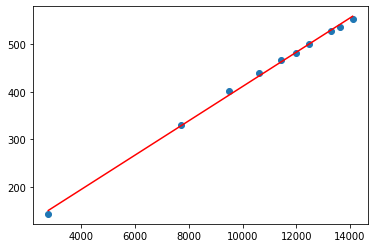

In [22]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [23]:
'''Calculating Slope annd Y-Intercept of Regression Line Cell'''

#Calculate slope by dividing the two calculated values (Y2-Y1) and (X2-X1)

print(linear_regressor.coef_[0][0])

#Calculate the Y-Intercept of line
print(linear_regressor.intercept_[0])

0.03603302160653699
50.62429037726173


In [24]:
from scipy import stats

import itertools
x = list(itertools.chain(*X))
y = list(itertools.chain(*Y))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
confidence_interval = 2.58*std_err
confidence_interval

(slope-confidence_interval, slope+confidence_interval)

(0.03456726646840015, 0.03749877674467386)

In [32]:
derivativeList

0       NaN
1    4923.0
2    1800.0
3    1107.0
4     845.0
5     561.0
6     482.0
7     818.0
8     310.0
9     485.0
Name: Favorites, dtype: float64

In [33]:
derivativeList_r

0      NaN
1    187.0
2     71.0
3     39.0
4     27.0
5     14.0
6     19.0
7     28.0
8      9.0
9     15.0
Name: Retweets, dtype: float64

In [34]:
dataFrame_Brownlee[5:10]

,DateTime,Favorites,Retweets
5,2021-02-13 14:30:00,12002,481
6,2021-02-13 15:30:00,12484,500
7,2021-02-13 16:30:00,13302,528
8,2021-02-13 17:30:00,13612,537
9,2021-02-13 18:30:00,14097,552


In [ ]:
#15:30:00 PM (3:30 PM) is where Favorites increases (2nd wave)
#14:30:00 PM (2:30 PM) is where Retweets increases (2nd wave)